In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv('/content/student_dropout.csv')
df.head()

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,False
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,False
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,False
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,False


In [11]:
df['Dropped_Out'] = df['Dropped_Out'].astype(int)

features = ['Age', 'Study_Time', 'Number_of_Failures', 'Number_of_Absences', 'Grade_1', 'Grade_2', 'Final_Grade']

x = df[features].values
y = df['Dropped_Out'].values

print(f"x : {x}\n\ny : {y}")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x : [[18  2  0 ...  0 11 11]
 [17  2  0 ...  9 11 11]
 [15  2  0 ... 12 13 12]
 ...
 [18  2  0 ... 11 12  9]
 [17  1  0 ... 10 10 10]
 [18  1  0 ... 10 11 11]]

y : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0

In [12]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

sample_input = [[17, 1, 1, 10, 9, 8, 8]]
prediction = model.predict(sample_input)
probability = model.predict_proba(sample_input)[0][1]

result = "Dropout" if prediction[0] == 1 else "Stay"
print(f"Prediction for sample student: {result} (Probability: {probability:.2f})")

Prediction for sample student: Dropout (Probability: 1.00)


Model Accuracy: 100.00%
              precision    recall  f1-score   support

        Stay       1.00      1.00      1.00       115
     Dropout       1.00      1.00      1.00        15

    accuracy                           1.00       130
   macro avg       1.00      1.00      1.00       130
weighted avg       1.00      1.00      1.00       130



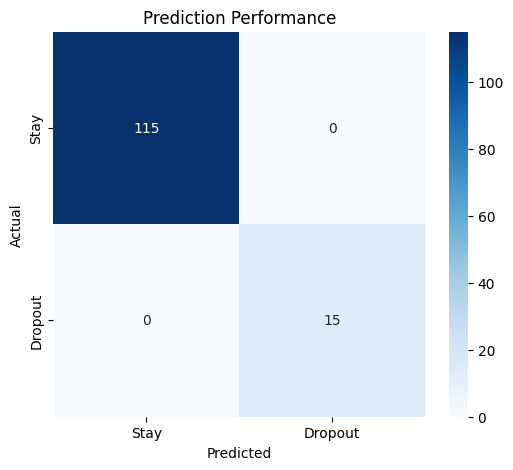

In [ ]:
predictions = model.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

print(classification_report(y_test, predictions, target_names=['Stay', 'Dropout']))

plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stay', 'Dropout'], yticklabels=['Stay', 'Dropout'])
plt.title('Prediction Performance')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()